In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [6]:
IMAGE_SHAPE=(224,224)
# Define the TensorFlow Hub KerasLayer
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))

# Wrap the TensorFlow Hub KerasLayer in a Lambda layer
wrapped_layer = tf.keras.layers.Lambda(lambda x: hub_layer(x))

# Create the Sequential model and add the wrapped layer
classifier = tf.keras.Sequential([
    wrapped_layer
])

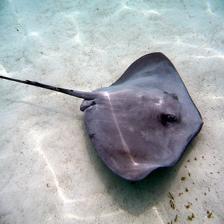

In [7]:
stingray=Image.open("datasets/stingray.jpeg").resize(IMAGE_SHAPE)
stingray

In [8]:
stingray=np.array(stingray)/255.0
print(stingray.shape)
stingray

(224, 224, 3)


array([[[0.40392157, 0.61568627, 0.61176471],
        [0.42745098, 0.62352941, 0.64705882],
        [0.41960784, 0.6       , 0.63529412],
        ...,
        [0.42745098, 0.62745098, 0.6745098 ],
        [0.43921569, 0.63529412, 0.68235294],
        [0.44705882, 0.63137255, 0.6745098 ]],

       [[0.41176471, 0.62352941, 0.63137255],
        [0.44313725, 0.63137255, 0.66666667],
        [0.46666667, 0.64705882, 0.6745098 ],
        ...,
        [0.4745098 , 0.66666667, 0.70980392],
        [0.4745098 , 0.6627451 , 0.69803922],
        [0.4627451 , 0.64705882, 0.67843137]],

       [[0.42352941, 0.62352941, 0.64705882],
        [0.44313725, 0.62745098, 0.6627451 ],
        [0.4627451 , 0.63921569, 0.6627451 ],
        ...,
        [0.47843137, 0.66666667, 0.70196078],
        [0.48235294, 0.66666667, 0.68627451],
        [0.47058824, 0.65098039, 0.67058824]],

       ...,

       [[0.54901961, 0.55686275, 0.55686275],
        [0.54901961, 0.57647059, 0.57647059],
        [0.54509804, 0

In [9]:
stingray[np.newaxis,...].shape

(1, 224, 224, 3)

In [10]:
result=classifier.predict(stingray[np.newaxis,...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1001)

In [11]:
result

array([[ 0.25670275,  0.55516624, -0.53881353, ..., -0.866678  ,
        -1.4372841 , -0.01348642]], dtype=float32)

In [12]:
predicted_label_index=np.argmax(result)
predicted_label_index

7

In [14]:
with open("datasets/ImageNetLabels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
image_labels[predicted_label_index]

'stingray'

In [16]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
data_dir

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


'.\\datasets\\flower_photos'

In [17]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

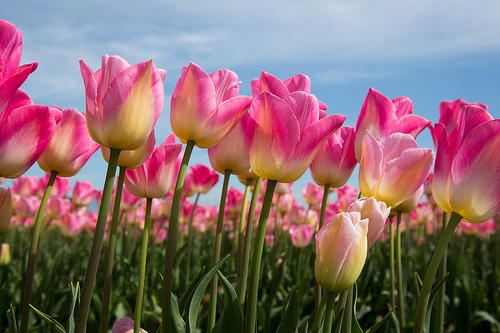

In [20]:
tulips=list(data_dir.glob('tulips/*.jpg'))
Image.open(str(tulips[3]))

In [21]:
flowers_images_dict= {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [22]:
flowers_labels_dict ={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [23]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [24]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [25]:
X, y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [26]:
X=np.array(X)
y=np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [28]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

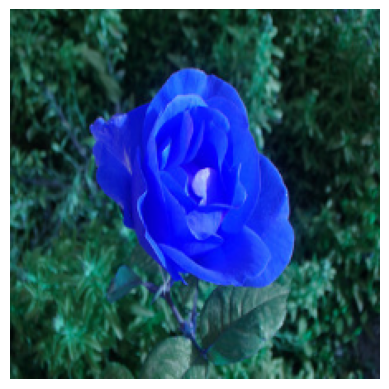

In [29]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(X[320])

In [30]:
predicted=classifier.predict(np.array([X[320]]))
predicted=np.argmax(predicted)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


795

In [31]:
image_labels[795]

'shower curtain'

In [32]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [34]:
num_of_flowers=5
pretrained_model_without_top_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5", input_shape=(224,224,3))

# Wrap the TensorFlow Hub KerasLayer in a Lambda layer
wrapped_layer = tf.keras.layers.Lambda(lambda x: pretrained_model_without_top_layer(x))

# Define the Sequential model and add the wrapped layer
model = tf.keras.Sequential([
    wrapped_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

# Print the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 472ms/step - acc: 0.5301 - loss: 1.1951
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 562ms/step - acc: 0.8359 - loss: 0.4575
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 509ms/step - acc: 0.8881 - loss: 0.3306
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 560ms/step - acc: 0.9179 - loss: 0.2653
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 520ms/step - acc: 0.9325 - loss: 0.2351


In [36]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 338ms/step - acc: 0.8506 - loss: 0.3933


[0.38055190443992615, 0.8594771027565002]

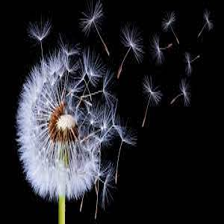

In [37]:
dandelion=Image.open("datasets/dandelion.jpeg").resize(IMAGE_SHAPE)
dandelion

In [40]:
dandelion=np.array(stingray)/255.0
dandelion.shape

(224, 224, 3)

In [42]:
flower_result=model.predict(dandelion[np.newaxis,...])
flower_result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 5)

In [43]:
flower_result

array([[-0.5364099 , -3.3103595 ,  0.41843602, -4.7778463 , -2.0811586 ]],
      dtype=float32)

In [44]:
predicted_class_flower=np.argmax(flower_result)
predicted_class_flower

2

In [47]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}